In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from saveload import saveload as sl
# from os import path
# from os import listdir
# from os.path import isfile, join
import os
import re
import glob

In [2]:
os.name

'nt'

In [3]:
# get current directory 
path = os.getcwd() 
print("Current Directory", path) 
print(path)

Current Directory C:\Users\hlb749\OneDrive - University of Saskatchewan\WhiteGull\MESH_Whitegull\Model\Config_PointScale\Test_Jan-20-2020_1718
C:\Users\hlb749\OneDrive - University of Saskatchewan\WhiteGull\MESH_Whitegull\Model\Config_PointScale\Test_Jan-20-2020_1718


In [4]:
# Obtain the trial name from the directory name

start = path.rfind('\\')+1 if path.rfind('\\') > 0 else path.rfind('/')+1
# try:
#     start = path.rfind('\\')+1
#     print('Try returned successful')
# except:
#     start = path.rfind('/')+1
#     print('Try returned unsuccessful and exception triggered')

print(start)    
# rfind searches a string starting from the end
# used try/except to be compatible when running both from windows and the command line
end = -17
trial = path[start:end]
print('Trial='+trial)

103
Trial=Test


# Load the Water Balance file
and format the dataframe

In [5]:
# fname = "BASINAVG1"
# trial = 'Test'
# fRead = "../Model/Config_PointScale/"+fname+"/Basin_average_water_balance.csv"
WB = pd.read_csv("Basin_average_water_balance.csv", skipinitialspace=True)
WB = WB.drop(columns="Unnamed: 36")
WB

,YEAR,DAY,PREACC,EVAPACC,ROFACC,ROFOACC,ROFSACC,ROFBACC,DSTGACC,PRE,...,LQWS3,FRWS3,ALWS3,LQWS,FRWS,ALWS,LZS,DZS,STG,DSTG
0,1998,274,0.000000,0.150340,0.103986,0.000,0.0,0.103986,-0.106140,0.000000,...,416.1355,0.0,416.1355,437.4478,22.39179,459.8396,0.0,0.0,488.8749,-0.106140
1,1998,275,0.000000,0.541390,0.207015,0.000,0.0,0.207015,-0.290253,0.000000,...,415.7958,0.0,415.7958,442.2351,21.66187,463.8970,0.0,0.0,488.5068,-0.368072
2,1998,276,3.041093,2.135107,0.309092,0.000,0.0,0.309092,0.027496,3.041093,...,415.4547,0.0,415.4547,449.1519,19.17695,468.3288,0.0,0.0,489.6442,1.137360
3,1998,277,5.999998,2.599466,0.410520,0.000,0.0,0.410520,0.500427,2.958905,...,415.2410,0.0,415.2410,457.4399,15.32126,472.7611,0.0,0.0,490.9003,1.256134
4,1998,278,5.999998,2.888837,0.511689,0.000,0.0,0.511689,0.963715,0.000000,...,415.1991,0.0,415.1991,465.4429,10.78325,476.2262,0.0,0.0,491.7982,0.897919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2008,270,4843.097000,3794.623000,1203.696000,1049.428,0.0,154.697100,-57.143950,0.000000,...,251.7975,0.0,251.7975,334.1591,0.00000,334.1591,0.0,0.0,334.1592,-0.584442
3649,2008,271,4845.097000,3795.466000,1203.696000,1049.428,0.0,154.698400,-57.170200,2.000000,...,256.3169,0.0,256.3169,334.0628,0.00000,334.0628,0.0,0.0,334.0986,-0.060608
3650,2008,272,4845.097000,3795.653000,1203.696000,1049.428,0.0,154.699600,-57.196440,0.000000,...,259.8429,0.0,259.8429,334.3932,0.00000,334.3932,0.0,0.0,334.3936,0.295013
3651,2008,273,4845.097000,3796.593000,1203.696000,1049.428,0.0,154.701100,-57.222660,0.000000,...,262.4597,0.0,262.4597,333.8846,0.00000,333.8846,0.0,0.0,333.8847,-0.508881


In [6]:
startYear = WB['YEAR'][1]
print("Start year: %d" %startYear)
endYear = WB['YEAR'][len(WB.index)-1]
print("End year: %d" %endYear)

Start year: 1998
End year: 2008


In [7]:
Dates = pd.to_datetime(WB['YEAR'] * 1000 + WB['DAY'], format='%Y%j')
Dates[0]
Dates

0      1998-10-01
1      1998-10-02
2      1998-10-03
3      1998-10-04
4      1998-10-05
          ...    
3648   2008-09-26
3649   2008-09-27
3650   2008-09-28
3651   2008-09-29
3652   2008-09-30
Length: 3653, dtype: datetime64[ns]

In [8]:
WB.columns

Index(['YEAR', 'DAY', 'PREACC', 'EVAPACC', 'ROFACC', 'ROFOACC', 'ROFSACC',
       'ROFBACC', 'DSTGACC', 'PRE', 'EVAP', 'ROF', 'ROFO', 'ROFS', 'ROFB',
       'SNCAN', 'RCAN', 'SNO', 'WSNO', 'PNDW', 'LQWS1', 'FRWS1', 'ALWS1',
       'LQWS2', 'FRWS2', 'ALWS2', 'LQWS3', 'FRWS3', 'ALWS3', 'LQWS', 'FRWS',
       'ALWS', 'LZS', 'DZS', 'STG', 'DSTG'],
      dtype='object')

# Create a water balance plot

In [9]:
# Prep the dataframe

index = pd.date_range(Dates[0], periods = len(WB), freq="D")
index

WB2 = WB[['PRE', 'EVAP', 'ROF', 'ROFO', 'ROFS', 'ROFB']]
WB2.index = index

WB2 = WB2.resample('Y').sum()
WB2['dS'] = WB2['PRE'] - WB2['EVAP'] - WB2['ROF']
WB2
WB2['negdS'] = np.where(WB2['dS'] < 0, WB2['dS']*-1, 0)
WB2['posdS'] = np.where(WB2['dS'] > 0, WB2['dS'], 0)
WB2


,PRE,EVAP,ROF,ROFO,ROFS,ROFB,dS,negdS,posdS
1998-12-31,80.099973,26.412743,25.464353,10.975692,0.0,14.488660,28.222877,0.000000,28.222877
1999-12-31,488.131293,382.890836,99.223819,58.104999,0.0,41.118814,6.016638,0.000000,6.016638
2000-12-31,412.053420,354.919238,66.585210,20.287324,0.0,46.297886,-9.451028,9.451028,0.000000
2001-12-31,445.251385,416.464619,57.740441,44.186590,0.0,13.553853,-28.953675,28.953675,0.000000
2002-12-31,290.145010,325.620372,65.582450,62.220165,0.0,3.362280,-101.057812,101.057812,0.000000
2003-12-31,667.354118,430.409642,102.109218,99.876189,0.0,2.233026,134.835258,0.000000,134.835258
2004-12-31,598.015505,359.036442,182.937647,176.463776,0.0,6.473865,56.041417,0.000000,56.041417
2005-12-31,596.339409,362.203699,298.150185,285.067393,0.0,13.082824,-64.014475,64.014475,0.000000
2006-12-31,443.182460,408.097795,100.326108,87.823104,0.0,12.503000,-65.241443,65.241443,0.000000
2007-12-31,447.136721,375.357096,132.653721,131.244572,0.0,1.409162,-60.874095,60.874095,0.000000


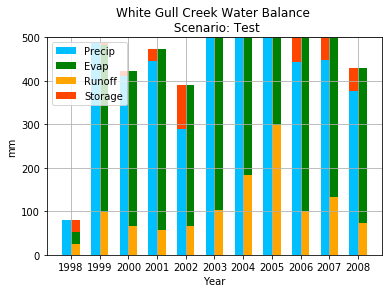

In [10]:
# Make the plot

w = 0.3
a = 'edge'
x = WB2.index.year
 
plt.bar(x, WB2['negdS'], align=a, width=-w, color='orangered', bottom=WB2['PRE'])
plt.bar(x, WB2['PRE'], align=a, width=-w, label='Precip', color='deepskyblue')
plt.bar(x, WB2['EVAP'], align=a, width=w, label='Evap', bottom=WB2['ROF'], color='g')
plt.bar(x, WB2['ROF'], align=a, width=w, label='Runoff', color='orange')
plt.bar(x, WB2['posdS'], align=a, width=w, color='orangered', label='Storage', bottom=WB2['EVAP']+WB2['ROF'])
plt.legend(loc='upper left')
plt.grid()
plt.xticks(x)
plt.xlabel('Year')
plt.ylabel('mm')
plt.title('White Gull Creek Water Balance \n Scenario: '+ trial)
plt.ylim(0, 500)
# plt.figure(num=None, figsize=(16, 12), dpi=80)

# Save the plot to a file
plt.savefig(trial+'.png', dpi=200)
plt.show()

# Create a water balance table

In [11]:
# Create a table of totals for each variable (precip, evaporation, runoff (overland, interflow, and baseflow), 
# and change in storage)
P_tot = WB['PREACC'][WB.index[-1]]
E_tot = WB['EVAPACC'][WB.index[-1]]
RO_tot = WB['ROFACC'][WB.index[-1]]
RO_tot_Overland = WB['ROFOACC'][WB.index[-1]]
RO_tot_Interflow = WB['ROFSACC'][WB.index[-1]]
RO_tot_Baseflow = WB['ROFBACC'][WB.index[-1]]
E_tot = WB['EVAPACC'][WB.index[-1]]
dS = P_tot - E_tot - RO_tot
dS

data = [['Total Precip', P_tot], ['Total Evap', E_tot], ['Total Runoff', RO_tot], ['Total Overland', RO_tot_Overland], 
        ['Total Interflow', RO_tot_Interflow], ['Total Baseflow ', RO_tot_Baseflow], ['Delta Storage', dS]]
Summary = pd.DataFrame(data, columns = ['Variable', 'Value'])
Summary.index = Summary.Variable
del Summary['Variable']
Summary


,Value
Variable,
Total Precip,4845.097
Total Evap,3797.908
Total Runoff,1203.696
Total Overland,1049.428
Total Interflow,0.000
Total Baseflow,154.703
Delta Storage,-156.507


In [12]:
# Save the totals table to a html file
# *** NOT COMPLETE ***

from pandas.plotting import table
# ax = plt.subplot(111, frame_on=False)
# table(Summary, cellText=Summary.Value, rowLabels=Summary.index, colLables=Summary.columns)
# table(ax, Summary)
# table()

# Summary.to_png(Trial+'.png')

# Compare outputs with observed data

## Load Soil VWC and Soil Temp Observations

In [13]:
# List the files in the directory

if os.name == 'nt':
    mypath = "C:\\Users\\hlb749\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation" 
    pathlistWC = glob.glob(mypath + "\\*SoilVWC*.csv") # for volumetric water content observations
    pathlistT = glob.glob(mypath + "\\*SoilTemp*.csv") # for soil temperature observations
else:
#     mypath = '/mnt/c/Users/hlb749/OneDrive - University of Saskatchewan/WhiteGull/MESH_Whitegull/Data/Raw/Validation'
    mypath = "../../../Data/Raw/Validation"
#     mypath = '/home/haleybrauner/OneDrive/WhiteGull/MESH_Whitegull/Data/Raw/Validation/'
#     pathlistWC = glob.glob(os.path.join(mypath, "/BER_OBS_07_SoilVWC*.csv")) # for volumetric water content observations
#     pathlistT = glob.glob(os.path.join(mypath, "/BER_OBS_07_SoilTemp*.csv")) # for soil temperature observations
    pathlistWC = glob.glob(mypath + "BER_OBS_07_SoilVWC*.csv") # for volumetric water content observations
    pathlistT = glob.glob(mypath + "BER_OBS_07_SoilTemp*.csv") # for soil temperature observations

print(mypath)
# print(glob.glob(os.path.join(mypath, 'BER_OBS_07_SoilVWC*.csv')))
print(pathlistWC)
print(pathlistT) 

# Obtained the import code (the "glob.glob" part from this site (not first answer): 
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory/3207254

C:\Users\hlb749\OneDrive - University of Saskatchewan\WhiteGull\MESH_Whitegull\Data\Raw\Validation
['C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_02.5cmNE_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_02.5cmNW_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_07.5cmNE_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_07.5cmNW_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_22.5cmNE_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_

In [14]:
pathlistWC

['C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_02.5cmNE_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_02.5cmNW_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_07.5cmNE_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_07.5cmNW_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_22.5cmNE_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_22.5cmNW_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan

In [15]:
# Create an inital dataframe for vwc

# Obtain the observation name from the file name
num=1

name = pathlistWC[num]
start = name.find('Soil')
end = name.find('11')-1
name = name[start:end]
name

'SoilVWC_02.5cmNW'

In [16]:
# Load the data frame and rename columns according to file name
vwc = pd.read_csv(pathlistWC[num], usecols=['Date', 'Value [Cubic meter per cubic meter]'], na_values=["---"])
# vwc1.columns.values[0]="Date_"+name
vwc.columns.values[1]=name
vwc.index = vwc["Date"]
vwc = vwc.drop(columns=["Date",name])
vwc

""
Date
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
...
2019-12-27
2019-12-28
2019-12-29


In [17]:
# Put all the observed VWC data in one dataframe
import re

for f in pathlistWC:
    name = f
    start = name.find('Soil')
    end = name.find('11')-1
    name = name[start:end]
    vwcX = pd.read_csv(f, usecols=['Date', 'Value [Cubic meter per cubic meter]'], na_values=["---"])
    vwcX.columns.values[1]=name
    vwcX.index = vwcX["Date"]
    vwcX = vwcX.drop(columns="Date")
    vwc = pd.concat([vwc,vwcX.iloc[:,0]], axis=1)
    
vwc['Date'] = vwc.index
vwc.index = pd.to_datetime(vwc.index)
vwc
   

,SoilVWC_02.5cmNE,SoilVWC_02.5cmNW,SoilVWC_07.5cmNE,SoilVWC_07.5cmNW,SoilVWC_22.5cmNE,SoilVWC_22.5cmNW,SoilVWC_60to90cmNE,SoilVWC_60to90cmNW,Date
Date,,,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05
...,...,...,...,...,...,...,...,...,...
2019-12-27,0.145948,0.028168,0.098116,0.025158,0.135809,0.180573,0.685408,0.239947,2019-12-27
2019-12-28,0.145378,0.028029,0.094234,0.024726,0.131020,0.178727,0.685463,0.240244,2019-12-28
2019-12-29,0.145319,0.027964,0.091828,0.024542,0.125688,0.176326,0.684489,0.240295,2019-12-29


In [18]:
# Calculate the average of the 2.5cm and 7.5cm measurements to use as the vwc for the first layer @ 5cm depth

vwc["SoilVWC_05.0cmNE"] = vwc[["SoilVWC_02.5cmNE","SoilVWC_07.5cmNE"]].mean(axis=1)
vwc["SoilVWC_05.0cmNW"] = vwc[["SoilVWC_02.5cmNW","SoilVWC_07.5cmNW"]].mean(axis=1)
vwc

# df['avg'] = df[['Monday', 'Tuesday']].mean(axis=1)

,SoilVWC_02.5cmNE,SoilVWC_02.5cmNW,SoilVWC_07.5cmNE,SoilVWC_07.5cmNW,SoilVWC_22.5cmNE,SoilVWC_22.5cmNW,SoilVWC_60to90cmNE,SoilVWC_60to90cmNW,Date,SoilVWC_05.0cmNE,SoilVWC_05.0cmNW
Date,,,,,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01,NaN,NaN
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02,NaN,NaN
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03,NaN,NaN
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04,NaN,NaN
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.145948,0.028168,0.098116,0.025158,0.135809,0.180573,0.685408,0.239947,2019-12-27,0.122032,0.026663
2019-12-28,0.145378,0.028029,0.094234,0.024726,0.131020,0.178727,0.685463,0.240244,2019-12-28,0.119806,0.026377
2019-12-29,0.145319,0.027964,0.091828,0.024542,0.125688,0.176326,0.684489,0.240295,2019-12-29,0.118573,0.026253


## Unit conversion for modelled Soil VWC

In [19]:
# Create a new dataframe of just the LQWS values
LQWS = WB[["LQWS1", "LQWS2", "LQWS3"]]
# Units are in kg/m2
LQWS.index = index
LQWS.loc[:,"VWC_S1"] = LQWS["LQWS1"]/1000/0.1
LQWS.loc[:,"VWC_S2"] = LQWS["LQWS2"]/1000/0.25
LQWS.loc[:,"VWC_S3"] = LQWS["LQWS3"]/1000/3.75
LQWS.loc[:,'Date'] = LQWS.index
LQWS

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,LQWS1,LQWS2,LQWS3,VWC_S1,VWC_S2,VWC_S3,Date
1998-10-01,5.676441,15.63586,416.1355,0.056764,0.062543,0.110969,1998-10-01
1998-10-02,10.249660,16.18963,415.7958,0.102497,0.064759,0.110879,1998-10-02
1998-10-03,15.426080,18.27109,415.4547,0.154261,0.073084,0.110788,1998-10-03
1998-10-04,18.015270,24.18363,415.2410,0.180153,0.096735,0.110731,1998-10-04
1998-10-05,18.396480,31.84731,415.1991,0.183965,0.127389,0.110720,1998-10-05
...,...,...,...,...,...,...,...
2008-09-26,20.788250,61.57338,251.7975,0.207882,0.246294,0.067146,2008-09-26
2008-09-27,20.260130,57.48579,256.3169,0.202601,0.229943,0.068351,2008-09-27
2008-09-28,19.543830,55.00647,259.8429,0.195438,0.220026,0.069291,2008-09-28
2008-09-29,19.022490,52.40252,262.4597,0.190225,0.209610,0.069989,2008-09-29


## Load Soil T Observations

In [20]:
# Create an inital dataframe for temp

# Obtain the observation name from the file name
num=0

nameT = pathlistT[num]
import re
start = nameT.find('Soil')
end = nameT.find('11')-1
nameT = nameT[start:end]
nameT

'SoilTemp_005cmNE'

In [21]:
# Load the data frame and rename columns according to file name
soilT = pd.read_csv(pathlistT[num], usecols=['Date', 'Value [degree Celsius]'], na_values=["---"])
soilT.columns.values[1]=nameT
soilT.index = soilT["Date"]
soilT = soilT.drop(columns=["Date",nameT])
soilT

""
Date
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
...
2019-12-27
2019-12-28
2019-12-29


In [22]:
# Put all the observed Soil Temp data in one dataframe

for f in pathlistT:
    nameT = f
    start = nameT.find('Soil')
    end = nameT.find('11')-1
    nameT = nameT[start:end]
    soilTX = pd.read_csv(f, usecols=['Date', 'Value [degree Celsius]'], na_values=["---"])
    soilTX.columns.values[1]=nameT
    soilTX.index = soilTX["Date"]
    soilTX = soilTX.drop(columns="Date")
    soilT = pd.concat([soilT,soilTX.iloc[:,0]], axis=1)
    
soilT['Date'] = soilT.index
soilT.index = pd.to_datetime(soilT.index)
soilT

,SoilTemp_005cmNE,SoilTemp_005cmNW,SoilTemp_020cmNE,SoilTemp_020cmNW,SoilTemp_100cmNE,SoilTemp_100cmNW,Date
Date,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05
...,...,...,...,...,...,...,...
2019-12-27,-0.733545,-1.943040,0.003022,0.319977,1.243727,NaN,2019-12-27
2019-12-28,-0.798579,-2.176121,-0.011731,0.305939,1.216367,NaN,2019-12-28
2019-12-29,-0.831033,-2.293746,-0.020851,0.288160,1.189121,NaN,2019-12-29


## Load Energy Balance file

In [23]:
EB = pd.read_csv("Basin_average_energy_balance.csv", skipinitialspace=True)
EB = EB.drop(columns="Unnamed: 19")
EB

,YEAR,DAY,FSIN,FSOUT,ALBT,FLIN,FLOUT,GTE,QH,QE,GZERO,TA,TCAN,CMAS,TSNOW,TPOND,TBAR1,TBAR2,TBAR3
0,1998,274,157.47300,137.26920,0.078000,275.2551,332.7780,3.418762,51.414460,4.324504,-1.965517,6.000885,5.011047,7.0,-2.770386,0.0,-1.302979,0.000061,4.765320
1,1998,275,152.69290,134.04230,0.082176,260.1313,338.1357,4.662201,26.202510,11.319630,3.747691,5.404816,6.086090,7.0,-0.174835,0.0,0.000061,0.000061,4.713104
2,1998,276,94.06191,82.88207,0.067963,301.5302,337.1960,4.511108,-19.487690,46.132930,8.103596,5.572052,5.634949,7.0,0.000061,0.0,0.000061,0.000061,4.661407
3,1998,277,28.25882,25.03441,0.077771,339.8014,337.6430,4.651154,-9.049020,13.441680,11.727290,6.151001,5.736145,7.0,0.000061,0.0,0.000061,0.000061,4.611420
4,1998,278,31.74395,28.22981,0.063800,338.0064,335.4238,4.171448,4.216105,8.376166,13.020640,7.084106,5.106476,7.0,0.000061,0.0,0.000061,0.000061,4.561279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2008,270,172.47670,153.04950,0.069085,270.4292,348.0914,6.656525,33.181990,42.726950,-0.876431,7.594727,6.854797,7.0,0.000000,0.0,6.082947,6.237946,10.068970
3649,2008,271,40.50330,35.96620,0.067497,320.4979,339.5327,5.017090,-2.559842,24.423430,-5.416237,5.474304,5.001587,7.0,0.000000,0.0,5.313782,6.044250,10.018160
3650,2008,272,27.43351,24.39886,0.062885,338.2796,342.5142,5.647705,16.020430,5.391013,-1.556364,5.307922,5.585266,7.0,0.000000,0.0,5.894775,6.148407,9.967316
3651,2008,273,120.81700,107.28290,0.069056,319.8038,359.2920,8.908997,26.575670,27.205800,12.066420,9.240234,9.417358,7.0,0.000000,0.0,7.089081,6.520569,9.921448


In [24]:
EB.columns

Index(['YEAR', 'DAY', 'FSIN', 'FSOUT', 'ALBT', 'FLIN', 'FLOUT', 'GTE', 'QH',
       'QE', 'GZERO', 'TA', 'TCAN', 'CMAS', 'TSNOW', 'TPOND', 'TBAR1', 'TBAR2',
       'TBAR3'],
      dtype='object')

In [25]:
startYear = WB['YEAR'][1]
startYear
endYear = WB['YEAR'][len(WB.index)-1]
endYear

Dates = pd.to_datetime(WB['YEAR'] * 1000 + WB['DAY'], format='%Y%j')
Dates[0]
Dates

index = pd.date_range(Dates[0], periods = len(EB), freq="D")
index

EB2 = EB[['QH', 'QE', 'TBAR1', 'TBAR2', 'TBAR3']]
# Units: QH and QE are in W/m2, TBAR in C for middle of the soil layer
# Note: the wiki (https://wiki.usask.ca/display/MESH/Variable+List) says that TBAR is in K, but the
# values in this instance are clearly in oC

EB2.index = index
EB2

,QH,QE,TBAR1,TBAR2,TBAR3
1998-10-01,51.414460,4.324504,-1.302979,0.000061,4.765320
1998-10-02,26.202510,11.319630,0.000061,0.000061,4.713104
1998-10-03,-19.487690,46.132930,0.000061,0.000061,4.661407
1998-10-04,-9.049020,13.441680,0.000061,0.000061,4.611420
1998-10-05,4.216105,8.376166,0.000061,0.000061,4.561279
...,...,...,...,...,...
2008-09-26,33.181990,42.726950,6.082947,6.237946,10.068970
2008-09-27,-2.559842,24.423430,5.313782,6.044250,10.018160
2008-09-28,16.020430,5.391013,5.894775,6.148407,9.967316
2008-09-29,26.575670,27.205800,7.089081,6.520569,9.921448


In [26]:
EB2[['QH']]

,QH
1998-10-01,51.414460
1998-10-02,26.202510
1998-10-03,-19.487690
1998-10-04,-9.049020
1998-10-05,4.216105
...,...
2008-09-26,33.181990
2008-09-27,-2.559842
2008-09-28,16.020430
2008-09-29,26.575670


# Plotting

<function matplotlib.pyplot.show(*args, **kw)>

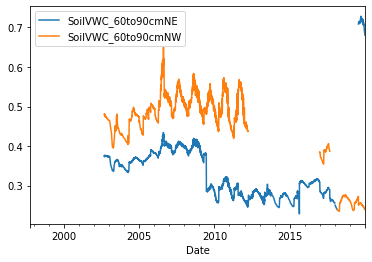

In [27]:
# Initial plots

vwc.plot(kind='line', y=["SoilVWC_60to90cmNE", "SoilVWC_60to90cmNW"])
# LQWS.plot(kind='line', y="VWC_S1")
plt.show

# The method above is using the Pandas plotting function, not the pyplot functions.

## Plot modelled vs observed soil moisture

In [78]:
start = LQWS.index[0].strftime("%Y-%m-%d")
end = LQWS.index[len(LQWS)-1].strftime("%Y-%m-%d")
print(start)
print(end)

1998-10-01
2008-09-30


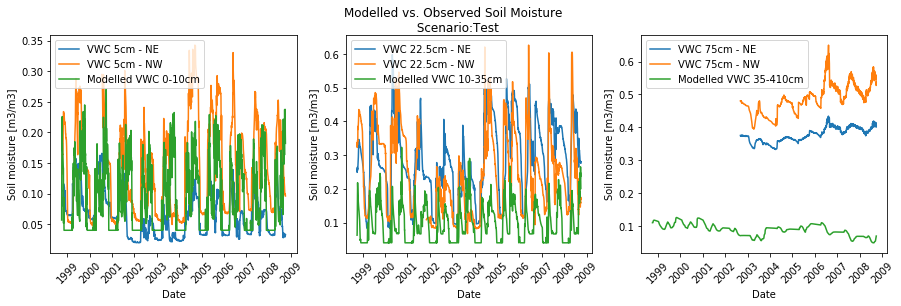

In [86]:
fig = plt.figure(figsize=(15,4), frameon=False)
fig.suptitle("Modelled vs. Observed Soil Moisture \n Scenario:" + trial)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(vwc[['SoilVWC_05.0cmNE']][start:end], label = "VWC 5cm - NE")
ax1.plot(vwc[['SoilVWC_05.0cmNW']][start:end], label = "VWC 5cm - NW")
ax1.plot(LQWS[['VWC_S1']], label = "Modelled VWC 0-10cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil moisture [m3/m3]")
# plt.ylim((0, 0.7)) 
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(vwc[['SoilVWC_22.5cmNE']][start:end], label = "VWC 22.5cm - NE")
ax2.plot(vwc[['SoilVWC_22.5cmNW']][start:end], label = "VWC 22.5cm - NW")
ax2.plot(LQWS[['VWC_S2']], label = "Modelled VWC 10-35cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil moisture [m3/m3]")
# plt.ylim((0, 0.7))
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(vwc[['SoilVWC_60to90cmNE']][start:end], label = "VWC 75cm - NE")
ax3.plot(vwc[['SoilVWC_60to90cmNW']][start:end], label = "VWC 75cm - NW")
ax3.plot(LQWS[['VWC_S3']], label = "Modelled VWC 35-410cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil moisture [m3/m3]")
# plt.ylim((0, 0.7)) 
ax3.legend(loc='upper left')
plt.xlabel("Date")

plt.show()
fig.savefig('SoilMoisture_'+trial+'.png', dpi=200)

# To improve:
# - Share a y-axis
# - Add a title across the whole plot (not just one sub-plot)
# - Avoid repeating the formatting (i.e. ylim, xtick rotation) above


## Plot modelled vs. observed soil temperature

<function matplotlib.pyplot.show(*args, **kw)>

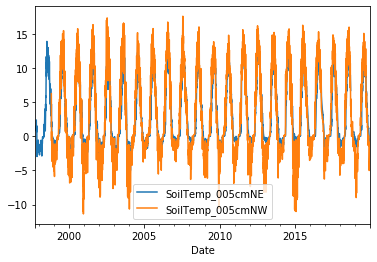

In [31]:
soilT.plot(kind='line', y=["SoilTemp_005cmNE", "SoilTemp_005cmNW"])
# LQWS.plot(kind='line', y="VWC_S1")
plt.show

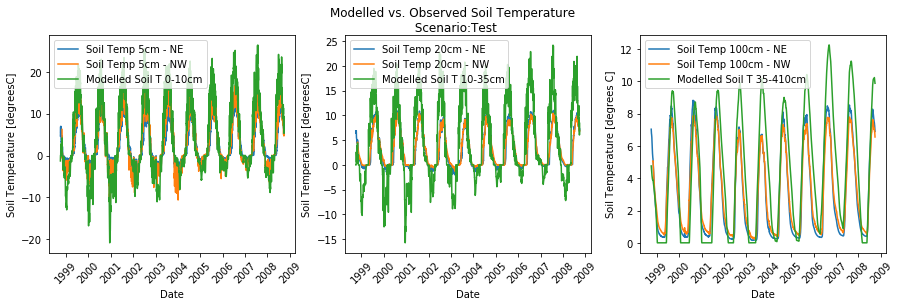

In [87]:
# Use same start and end as above
fig = plt.figure(figsize=(15,4), frameon=False)
fig.suptitle("Modelled vs. Observed Soil Temperature \n Scenario:" + trial)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(soilT[['SoilTemp_005cmNE']][start:end], label = "Soil Temp 5cm - NE")
ax1.plot(soilT[['SoilTemp_005cmNW']][start:end], label = "Soil Temp 5cm - NW")
ax1.plot(EB2[['TBAR1']], label = "Modelled Soil T 0-10cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil Temperature [degreesC]")
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(soilT[['SoilTemp_020cmNE']][start:end], label = "Soil Temp 20cm - NE")
ax2.plot(soilT[['SoilTemp_020cmNW']][start:end], label = "Soil Temp 20cm - NW")
ax2.plot(EB2[['TBAR2']], label = "Modelled Soil T 10-35cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil Temperature [degreesC]")
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(soilT[['SoilTemp_100cmNE']][start:end], label = "Soil Temp 100cm - NE")
ax3.plot(soilT[['SoilTemp_100cmNW']][start:end], label = "Soil Temp 100cm - NW")
ax3.plot(EB2[['TBAR3']], label = "Modelled Soil T 35-410cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil Temperature [degrees C]")
ax3.legend(loc='upper left')

plt.show()
fig.savefig('SoilTemp_' + trial + '.png', dpi=200)

In [88]:
EB2
# soilT

,QH,QE,TBAR1,TBAR2,TBAR3
1998-10-01,51.414460,4.324504,-1.302979,0.000061,4.765320
1998-10-02,26.202510,11.319630,0.000061,0.000061,4.713104
1998-10-03,-19.487690,46.132930,0.000061,0.000061,4.661407
1998-10-04,-9.049020,13.441680,0.000061,0.000061,4.611420
1998-10-05,4.216105,8.376166,0.000061,0.000061,4.561279
...,...,...,...,...,...
2008-09-26,33.181990,42.726950,6.082947,6.237946,10.068970
2008-09-27,-2.559842,24.423430,5.313782,6.044250,10.018160
2008-09-28,16.020430,5.391013,5.894775,6.148407,9.967316
2008-09-29,26.575670,27.205800,7.089081,6.520569,9.921448
